In [3]:
#Ensayo 3
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io as sp
from scipy.io import loadmat
import mne
import glob
import os
import mimodulo as mm 

# Ensayo 3

In [4]:
ensay03_excel= r"C:\Users\monce\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx"
coordenadas=r"C:\Users\monce\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"

ensayo3_d= pd.read_excel(ensay03_excel, sheet_name=None, index_col=0) ##agarrar los mismos indíces del excel

Estadísticas por sujeto del ensayo 3


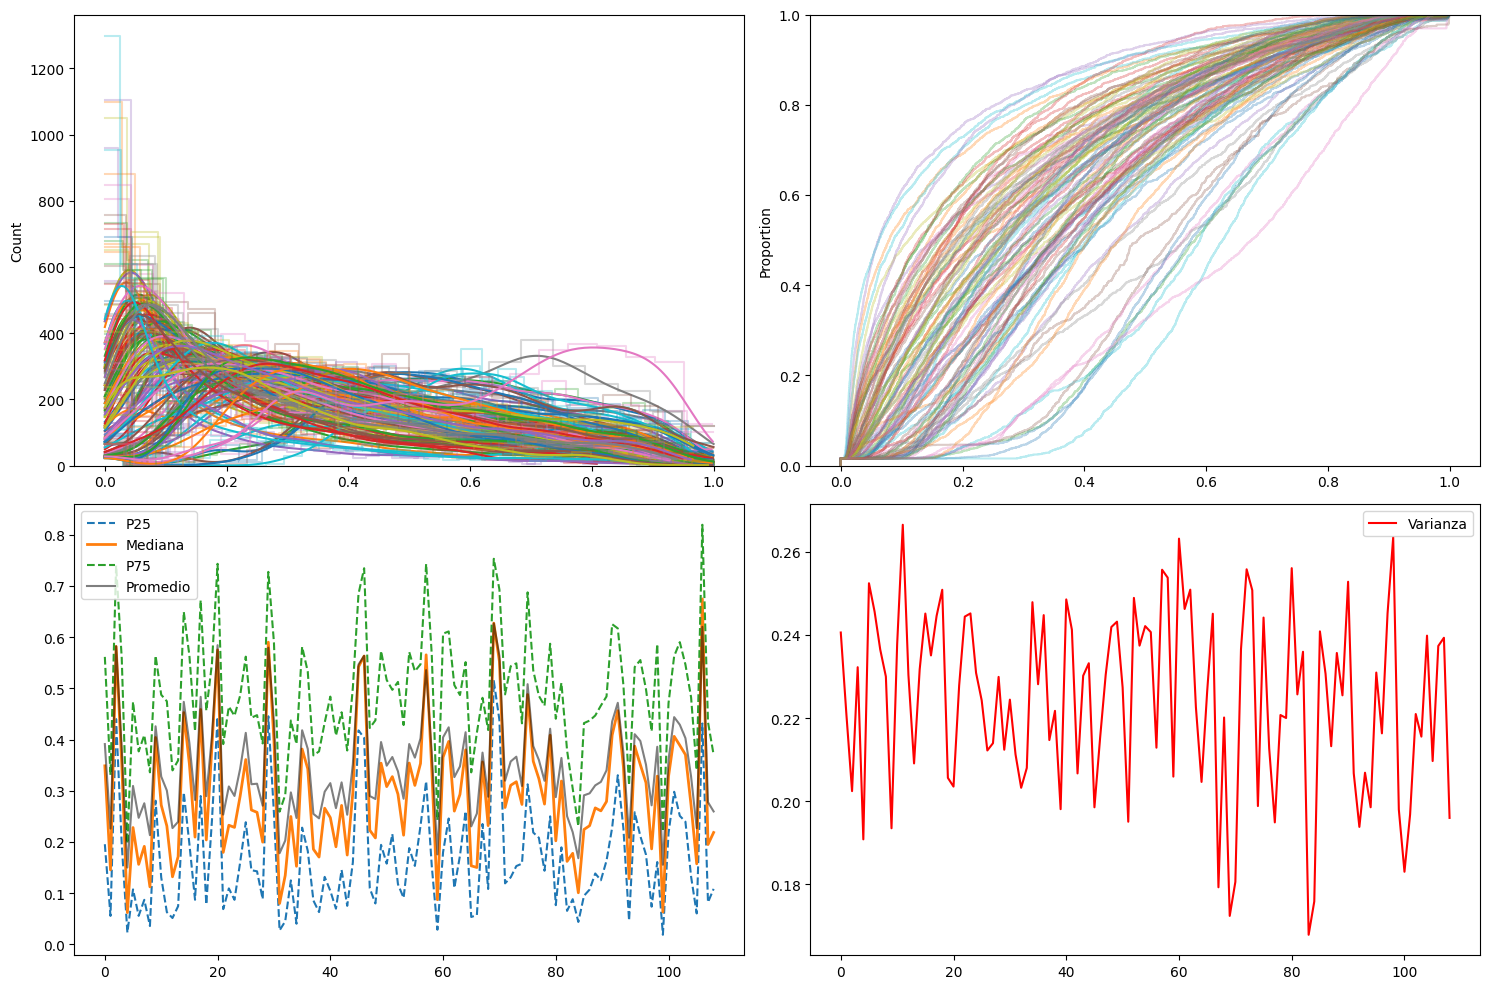

In [5]:

lista3=mm.lista_dfs(ensayo3_d)
print ("Estadísticas por sujeto del ensayo 3")
fig, axes = plt.subplots(2, 2, figsize=(15, 10)) 

t25, t50, t75, prom, var = mm.estadisticas(lista3, axes)
plt.tight_layout() 
plt.show()

In [9]:
mm.crear_tabla_resumen(t25, t50, t75, prom, var)

t25       t50       t75  promedio  varianza
min      0.018413  0.061750  0.196867  0.149821  0.167820
max      0.514472  0.674805  0.819681  0.626848  0.266529
media    0.166961  0.295352  0.489628  0.345504  0.224412
perc30   0.089118  0.220086  0.432409  0.288580  0.212498
mediana  0.144574  0.273808  0.484181  0.327700  0.227821

Text(0.5, 1.0, 'umbral=0.2, 0.3, 0.5, y 0.6, población>60%')

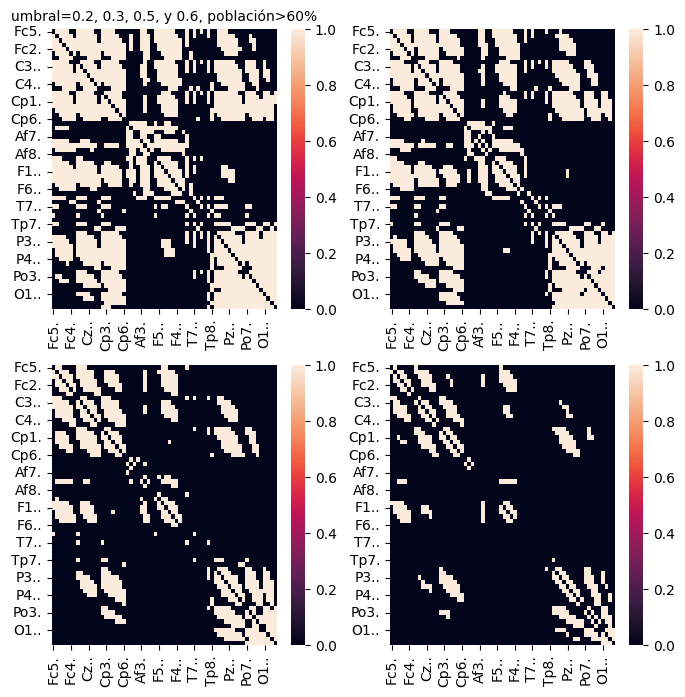

In [86]:
##### Explorar distintos umbrales
resultados1=mm.capsula(lista3, 0.29, 0.6)
resultados2=mm.capsula(lista3, 0.35, 0.6)
resultados3=mm.capsula(lista3, 0.5, 0.6)
resultados4=mm.capsula(lista3, 0.63, 0.6)


fig,axes= plt.subplots(2,2, figsize=(8,8))
sns.heatmap(resultados1, ax=axes [0,0])
sns.heatmap(resultados2, ax=axes [0,1])
sns.heatmap(resultados3, ax=axes [1,0])
sns.heatmap(resultados4, ax=axes [1,1])
axes[0,0].set_title("umbral=0.2, 0.3, 0.5, y 0.6, población>60%", fontsize=10)
###

Las cx motoras (primaria y premotora) son las encargada de ejercer control motor superior sobre 
el cuerpo.Son estructuras pre surco central por lo que su ubicación correspondería a
los electrodos prencentales FC.
La cx parietal (electrodos cp y p) también tiene fuertes conexiones con las cx motoras, así como la cx prefrontal (electrodos , especialmente para el control motor voluntario.
Además es importante mencionar que si el sujeto tenía los ojos abiertos debe haber actividad de la cx visual
Purves, D., Augustine, G. J., Fitzpatrick, D., Hall, W. C., & LaMantia, A. S. (2012). Neurociencia (5.ª ed.). Editorial Médica Panamericana.

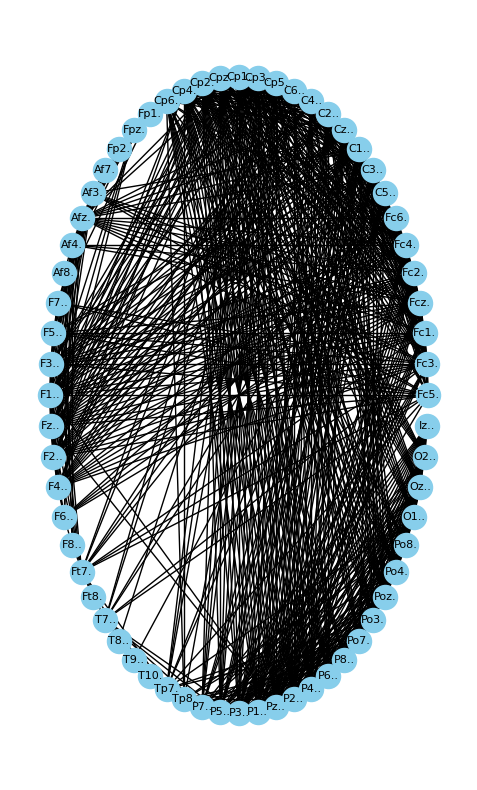

In [118]:
#Grafo de la conectividad del movimiento de las manos ajustado a un umbral de 0.63 en el 60% de la muestra.
grafo3=nx.from_pandas_adjacency (resultados3)
fig= plt.figure(figsize=(13,10))
metricas_df = pd.DataFrame([resultados_tupla], columns=nombres_columnas)

axes=[fig.add_subplot(1,2,1)]
mm.dibujar_grafo(grafo3, axes[0])

In [119]:
#Metricas
resultados_tupla= mm.metricas(grafo3)
(clust, path_len, sigma, communities, modularity, 
 betw_list, glob_eff, loc_eff, degree_dict) = resultados

# 3. Creamos el DataFrame "Bonito" (Resumen Global)
datos = {
    "Clustering Coeff": [clust],
    "Longitud Camino": [path_len],
    "Small World (Sigma)": [sigma],
    "Modularidad": [modularity],
    "Eficiencia Global": [glob_eff],
    "Eficiencia Local": [loc_eff],
    "Num. Comunidades": [len(communities)], # Solo guardamos la cantidad para que se vea bien
    "Hub Principal": [betw_list[0][0]]      # El primer nodo de la lista ordenada de betweenness
}

df_metricas = pd.DataFrame(datos)

metricas de grafo


metricas de grafo


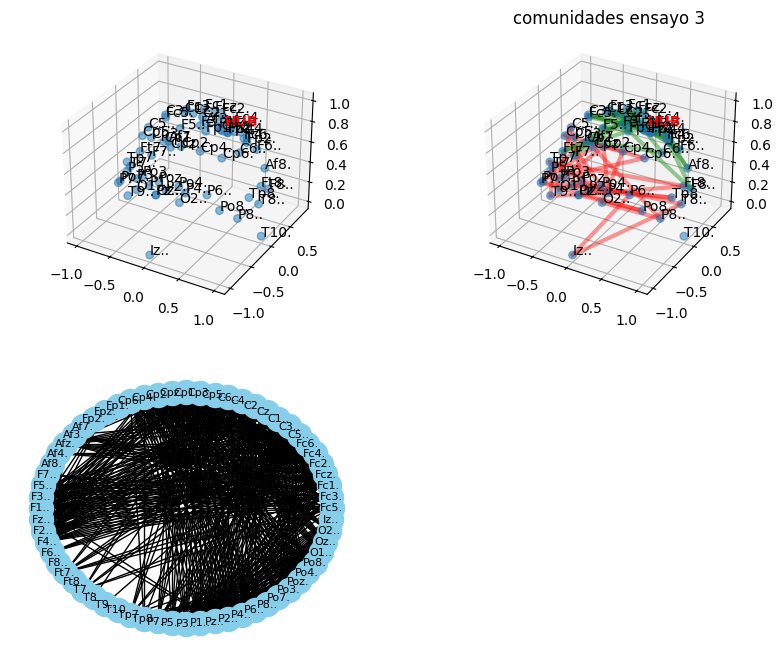

In [120]:
##Grafo 3d
(clust_3,path_length_3, small_world_sigma_3,communities_3,modularity_3,betwenness_3,global_eff_3, local_eff_3, degree_dict_3)=mm.metricas(grafo3)
coord= pd.read_csv(coordenadas)
coord.set_index("canal", drop=True, inplace=True)
hub= betwenness_3[0]
fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]
mm.grafo_3d (hub, coord, axes[0])
mm.grafo_de_comunidades(communities_3, hub, coord, axes[1])
mm.dibujar_grafo(grafo3, axes[2])

# Ensayo4

Estadísticas por sujeto del ensayo 4


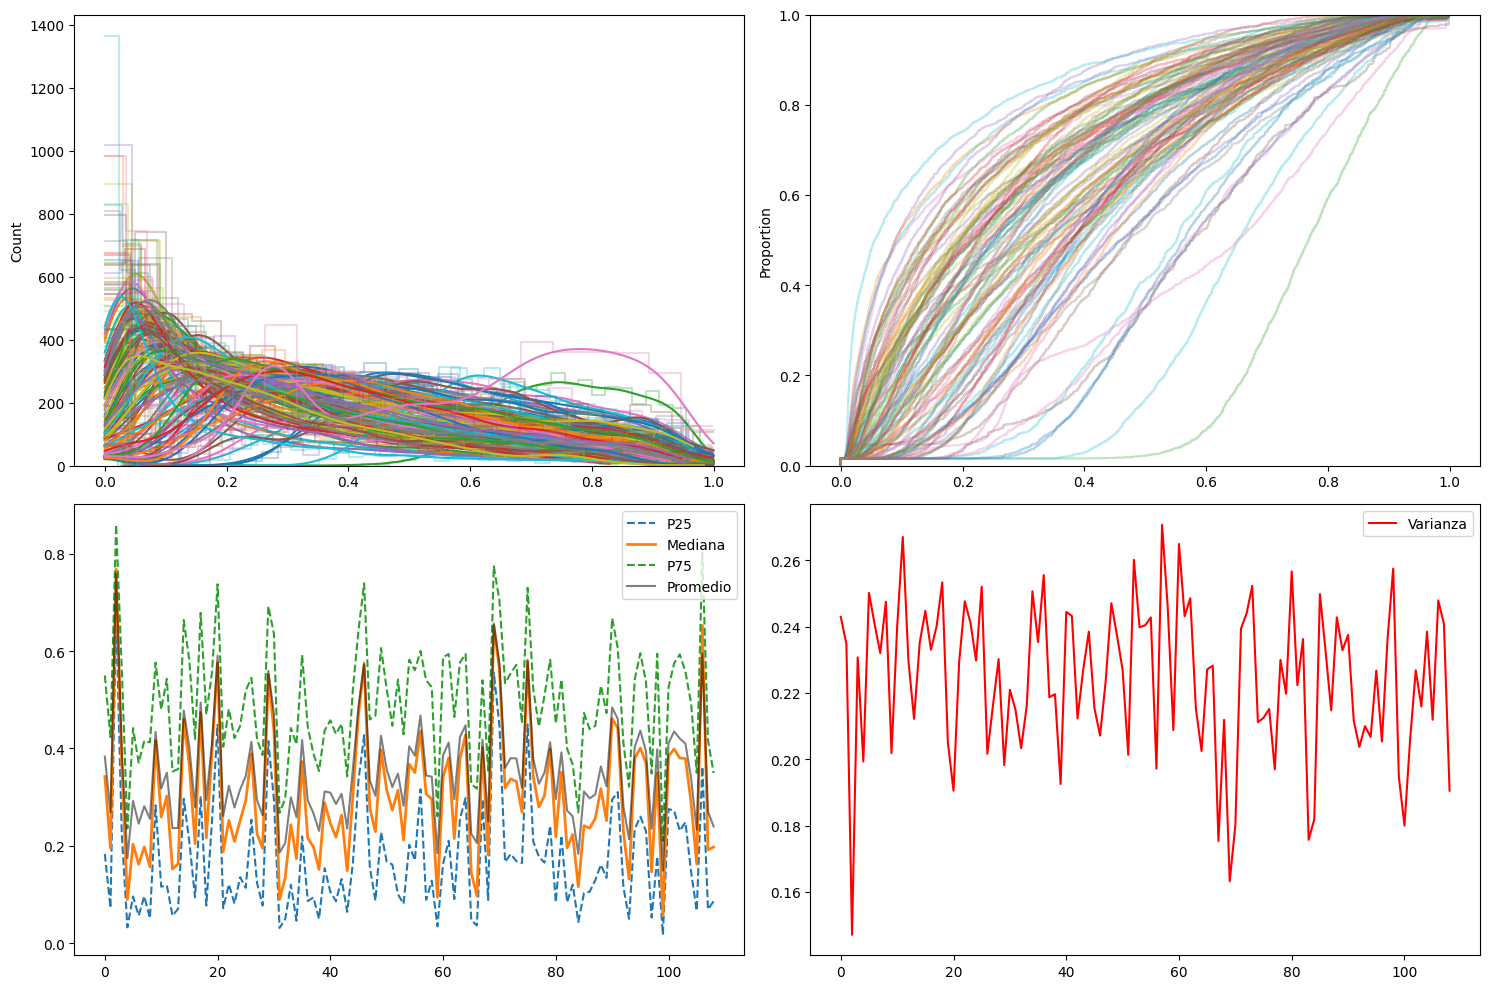

In [2]:
ensay04_excel= r"C:\Users\monce\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx"
coordenadas=r"C:\Users\monce\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"

ensayo4_d= pd.read_excel(ensay04_excel, sheet_name=None, index_col=0) ##agarrar los mismos indíces del excel
lista4=mm.lista_dfs(ensayo4_d)
print ("Estadísticas por sujeto del ensayo 4")
fig, axes = plt.subplots(2, 2, figsize=(15, 10)) 

t25_4, t50_4, t75_4, prom_4, var_4 = mm.estadisticas(lista4, axes)
plt.tight_layout() 
plt.show()

In [10]:
print("Cuadro de estadística para establecer umbrales")
mm.crear_tabla_resumen(t25_4, t50_4, t75_4, prom_4, var_4) ##Datos con valores más variables.

Cuadro de estadística para establecer umbrales


t25       t50       t75  promedio  varianza
min      0.016915  0.055561  0.210152  0.148728  0.147097
max      0.680820  0.768026  0.859416  0.758803  0.270675
media    0.171176  0.300271  0.495304  0.350497  0.224362
perc30   0.089362  0.215682  0.429064  0.288223  0.212241
mediana  0.135265  0.288254  0.480688  0.333706  0.228200

Text(0.5, 1.0, 'umbral=0.2, 0.3, 0.5, y 0.6, población>60%')

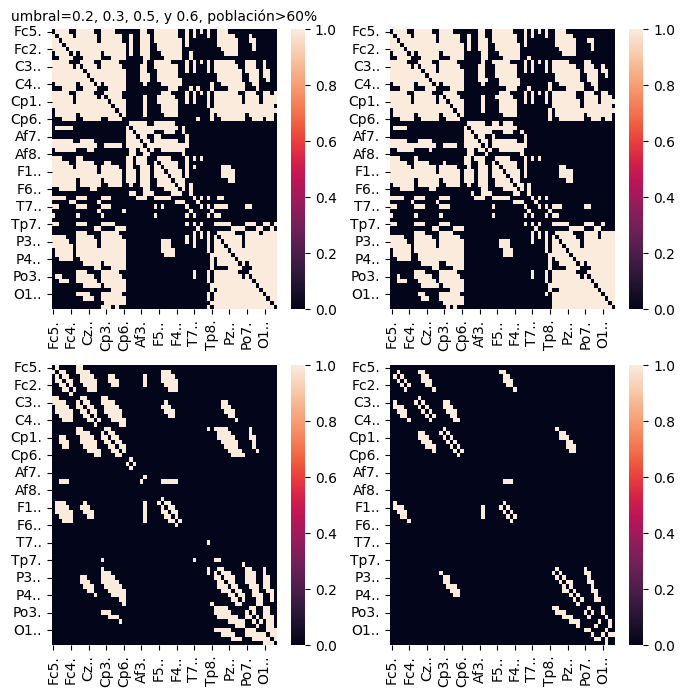

In [3]:
resultados1_4=mm.capsula(lista4, 0.29, 0.6)
resultados2_4=mm.capsula(lista4, 0.3, 0.6)
resultados3_4=mm.capsula(lista4, 0.6, 0.6)
resultados4_4=mm.capsula(lista4, 0.76, 0.6)


fig,axes= plt.subplots(2,2, figsize=(8,8))
sns.heatmap(resultados1_4, ax=axes [0,0])
sns.heatmap(resultados2_4, ax=axes [0,1])
sns.heatmap(resultados3_4, ax=axes [1,0])
sns.heatmap(resultados4_4, ax=axes [1,1])
axes[0,0].set_title("umbral=0.2, 0.3, 0.5, y 0.6, población>60%", fontsize=10)
###

In [4]:
grafo4=nx.from_pandas_adjacency (resultados3_4)
resultados_tupla= mm.metricas(grafo4)

metricas de grafo


metricas de grafo


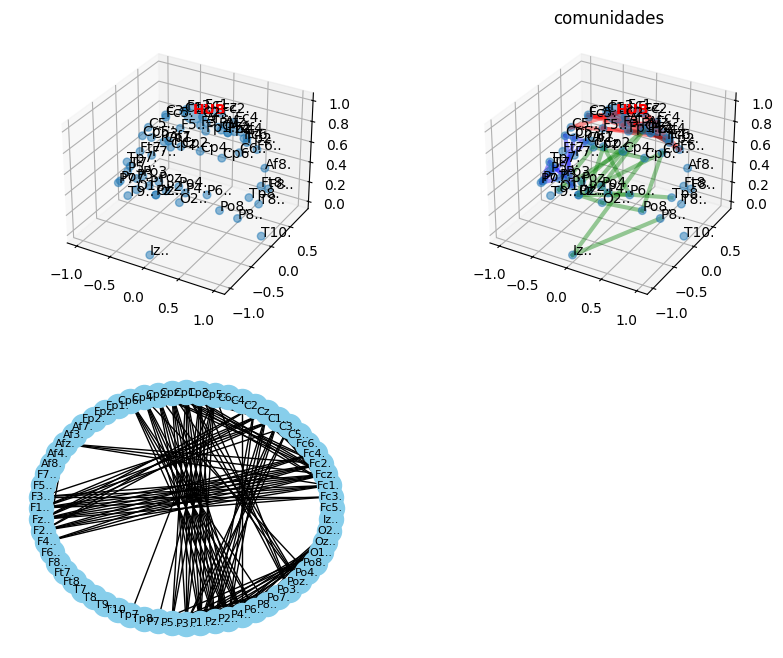

In [6]:
##Grafo 3d con hub por intermediación
(clust_4,path_length_4, small_world_sigma_4,communities_4,modularity_4,betwenness_4,global_eff_4, local_eff_4, degree_dict_4)=mm.metricas(grafo4)
coord= pd.read_csv(coordenadas)
coord.set_index("canal", drop=True, inplace=True)
hub_4= betwenness_4[0]
fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]
mm.grafo_3d (hub_4, coord, axes[0])
mm.grafo_de_comunidades(communities_4, hub_4, coord, axes[1])
mm.dibujar_grafo(grafo4, axes[2])

# Ensayo 5 y 6

Estadísticas por sujeto del ensayo 5


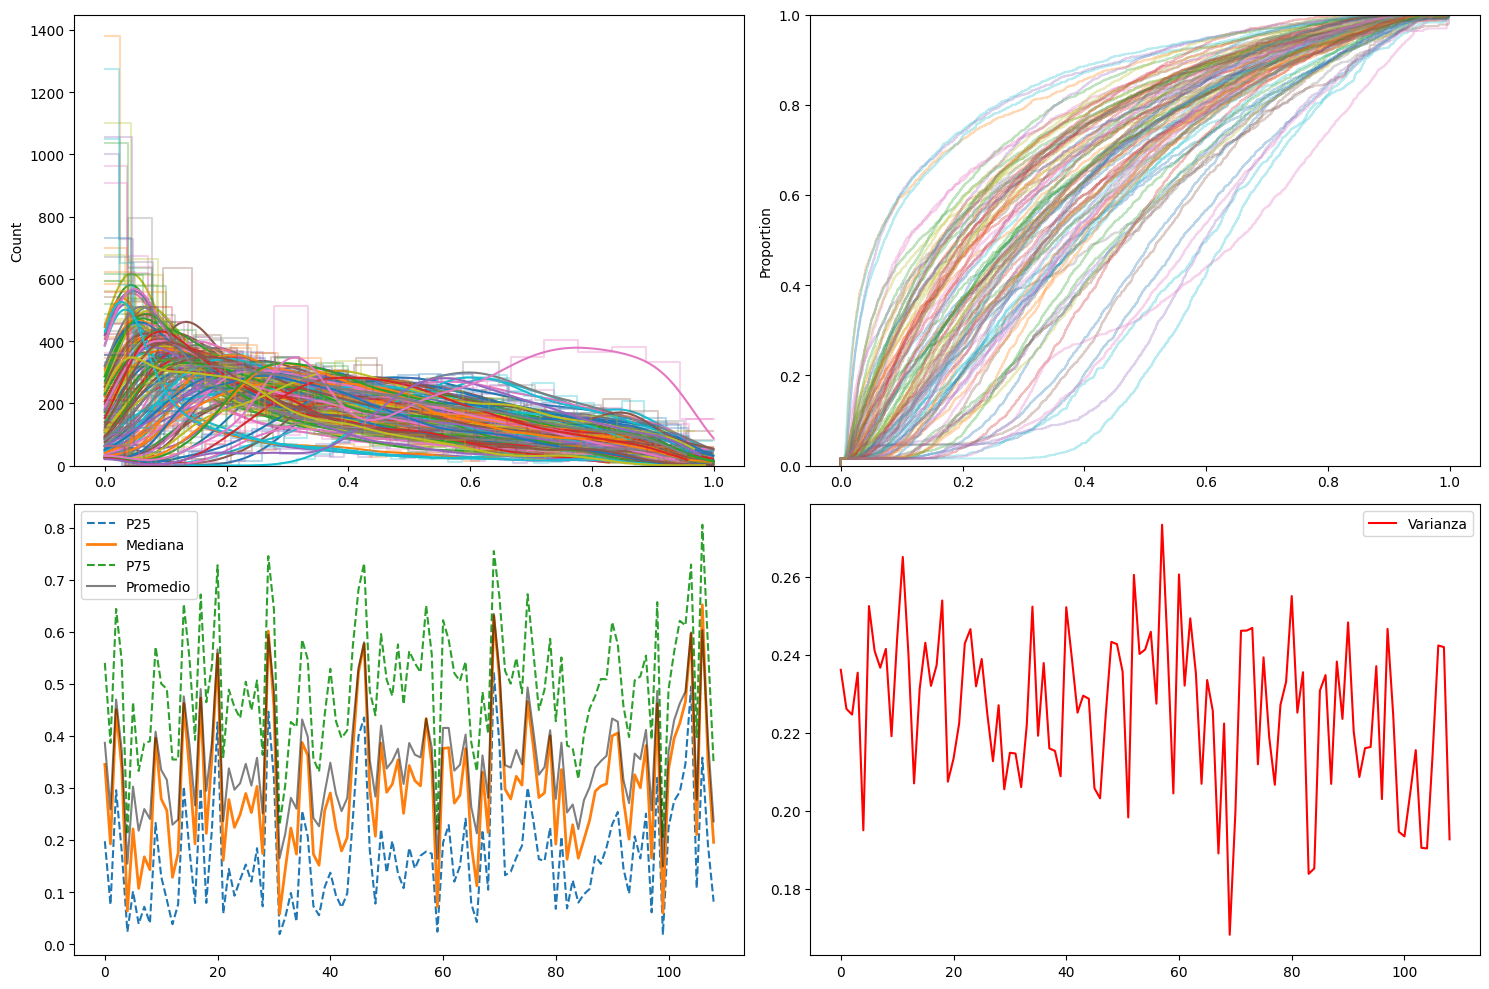

In [9]:
ensay05_excel= r"C:\Users\monce\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_05.xlsx"
coordenadas=r"C:\Users\monce\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"

ensayo5_d= pd.read_excel(ensay05_excel, sheet_name=None, index_col=0) ##agarrar los mismos indíces del excel
lista5=mm.lista_dfs(ensayo5_d)
print ("Estadísticas por sujeto del ensayo 5")
fig, axes = plt.subplots(2, 2, figsize=(15, 10)) 

t25_5, t50_5, t75_5, prom_5, var_5 = mm.estadisticas(lista5, axes)
plt.tight_layout() 
plt.show()

In [10]:
print("Cuadro de estadística para establecer umbrales ensayo 5")
mm.crear_tabla_resumen(t25_5, t50_5, t75_5, prom_5, var_5) 

Cuadro de estadística para establecer umbrales ensayo 5


t25       t50       t75  promedio  varianza
min      0.017846  0.057751  0.205711  0.149197  0.168151
max      0.522739  0.651729  0.805549  0.634132  0.273331
media    0.170356  0.300673  0.496600  0.350631  0.225886
perc30   0.097697  0.221970  0.430514  0.285579  0.215393
mediana  0.152787  0.293580  0.500263  0.345151  0.227127

Text(0.5, 1.0, 'umbral=0.2, 0.3, 0.5, y 0.6, población>60%')

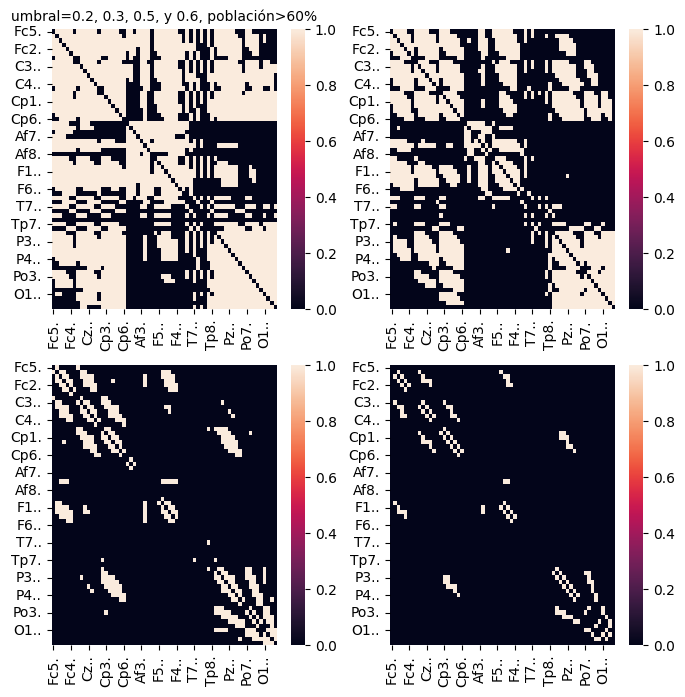

In [11]:
resultados1_5=mm.capsula(lista5, 0.2, 0.6)
resultados2_5=mm.capsula(lista5, 0.35, 0.6)
resultados3_5=mm.capsula(lista5, 0.65, 0.6)
resultados4_5=mm.capsula(lista5, 0.80, 0.6)


fig,axes= plt.subplots(2,2, figsize=(8,8))
sns.heatmap(resultados1_5, ax=axes [0,0])
sns.heatmap(resultados2_5, ax=axes [0,1])
sns.heatmap(resultados3_5, ax=axes [1,0])
sns.heatmap(resultados4_5, ax=axes [1,1])
axes[0,0].set_title("umbral=0.2, 0.3, 0.5, y 0.6, población>60%", fontsize=10)

In [12]:
grafo5=nx.from_pandas_adjacency (resultados2_5)
resultados_tupla= mm.metricas(grafo5)

metricas de grafo


metricas de grafo


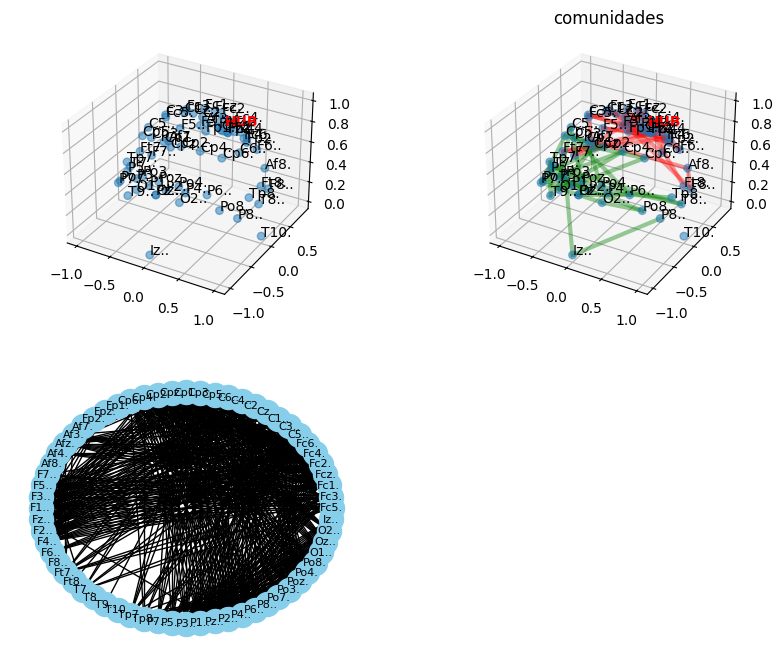

In [13]:
(clust_5,path_length_5, small_world_sigma_5,communities_5,modularity_5,betwenness_5,global_eff_5, local_eff_5, degree_dict_5)=mm.metricas(grafo5)
coord= pd.read_csv(coordenadas)
coord.set_index("canal", drop=True, inplace=True)
hub_5= betwenness_5[0]
fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]
mm.grafo_3d (hub_5, coord, axes[0])
mm.grafo_de_comunidades(communities_5, hub_5, coord, axes[1])
mm.dibujar_grafo(grafo5, axes[2])

Estadísticas por sujeto del ensayo 5


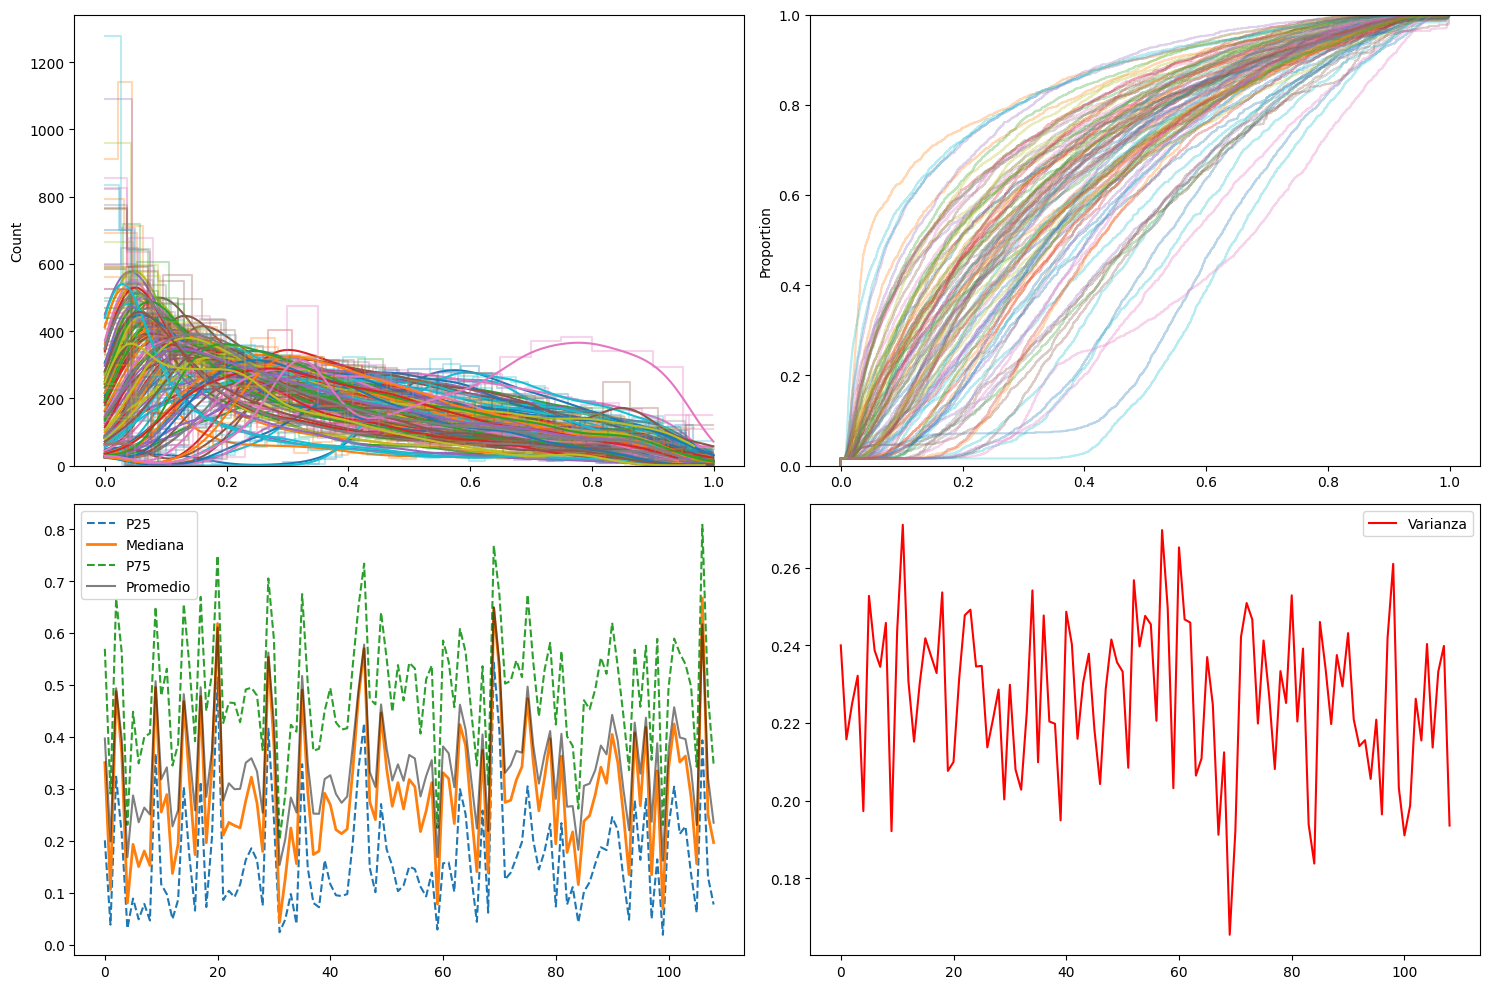

In [14]:
ensay06_excel= r"C:\Users\monce\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_06.xlsx"
coordenadas=r"C:\Users\monce\OneDrive\Documentos\GitHub\Neurociencias-2026-1\S03_datasets\MI_coordinates.csv"

ensayo6_d= pd.read_excel(ensay06_excel, sheet_name=None, index_col=0) ##agarrar los mismos indíces del excel
lista6=mm.lista_dfs(ensayo6_d)
print ("Estadísticas por sujeto del ensayo 5")
fig, axes = plt.subplots(2, 2, figsize=(15, 10)) 

t25_6, t50_6, t75_6, prom_6, var_6 = mm.estadisticas(lista6, axes)
plt.tight_layout() 
plt.show()

In [15]:
print("Cuadro de estadística para establecer umbrales ensayo 5")
mm.crear_tabla_resumen(t25_6, t50_6, t75_6, prom_6, var_6) 

Cuadro de estadística para establecer umbrales ensayo 5


t25       t50       t75  promedio  varianza
min      0.018750  0.043536  0.202194  0.153129  0.165417
max      0.542689  0.667679  0.808475  0.649729  0.271063
media    0.164531  0.292742  0.490668  0.345590  0.226772
perc30   0.097024  0.223154  0.432488  0.288200  0.215640
mediana  0.144532  0.276807  0.493891  0.333420  0.229833

Text(0.5, 1.0, 'umbral=0.2, 0.3, 0.5, y 0.6, población>60%')

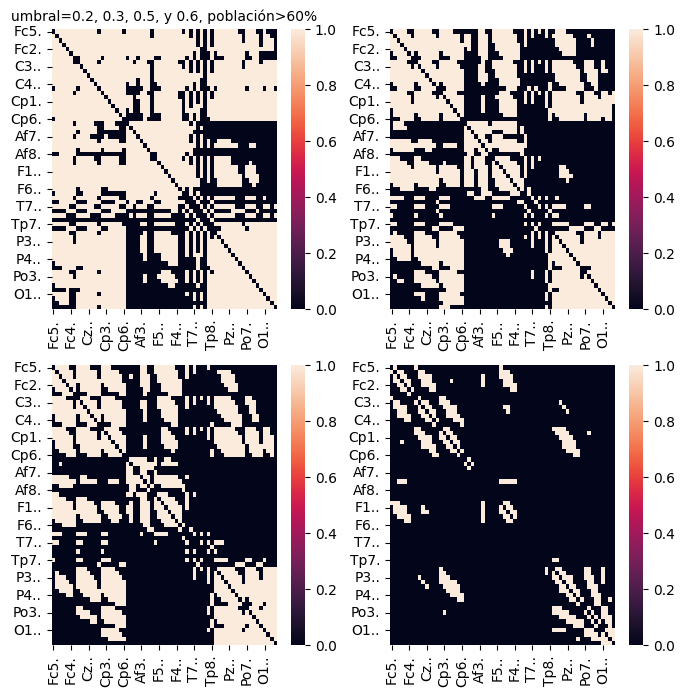

In [18]:
resultados1_6=mm.capsula(lista6, 0.15, 0.6)
resultados2_6=mm.capsula(lista6, 0.29, 0.6)
resultados3_6=mm.capsula(lista6, 0.35, 0.6)
resultados4_6=mm.capsula(lista6, 0.65, 0.6)


fig,axes= plt.subplots(2,2, figsize=(8,8))
sns.heatmap(resultados1_6, ax=axes [0,0])
sns.heatmap(resultados2_6, ax=axes [0,1])
sns.heatmap(resultados3_6, ax=axes [1,0])
sns.heatmap(resultados4_6, ax=axes [1,1])
axes[0,0].set_title("umbral=0.2, 0.3, 0.5, y 0.6, población>60%", fontsize=10)

In [20]:
grafo6=nx.from_pandas_adjacency (resultados3_6)
resultados_tupla= mm.metricas(grafo6)

metricas de grafo


metricas de grafo


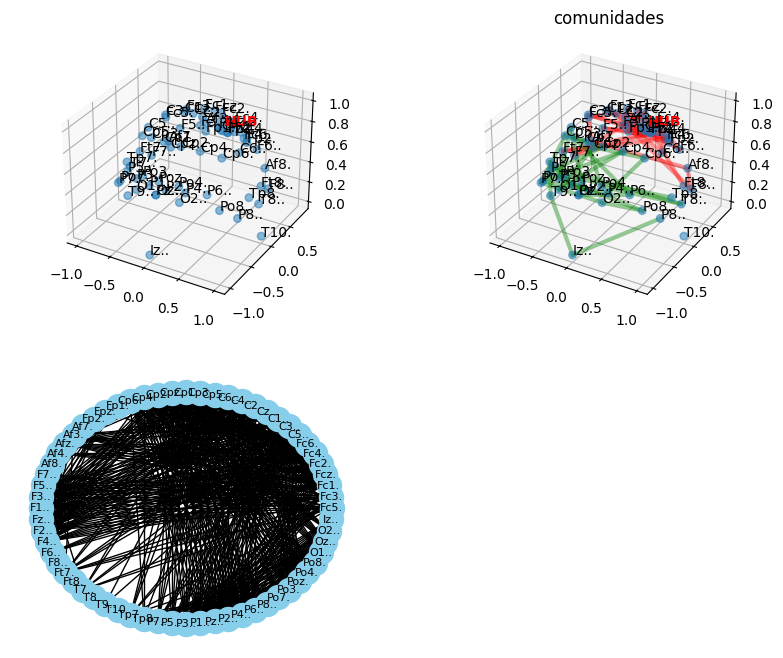

In [21]:
(clust_6,path_length_6, small_world_sigma_6,communities_6,modularity_6,betwenness_6,global_eff_6, local_eff_6, degree_dict_6)=mm.metricas(grafo6)
coord= pd.read_csv(coordenadas)
coord.set_index("canal", drop=True, inplace=True)
hub_6= betwenness_6[0]
fig = plt.figure(figsize=(10, 8))
axes = [fig.add_subplot(2, 2, 1, projection='3d'), 
        fig.add_subplot(2, 2, 2, projection='3d'), 
        fig.add_subplot(2, 2, 3)]
mm.grafo_3d (hub_6, coord, axes[0])
mm.grafo_de_comunidades(communities_6, hub_5, coord, axes[1])
mm.dibujar_grafo(grafo6, axes[2])